In [13]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import time
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [7]:
# Prepare dataset
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])

train_set = torchvision.datasets.MNIST(root = "./dataset",train=True,download=True,transform=transform)
#Make download == True to download dataset
test_set = torchvision.datasets.MNIST(root ="./dataset",train=False,download=True,transform=transform)

train_loader = torch.utils.data.DataLoader(train_set,batch_size=32,shuffle=True,num_workers=4)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=32,shuffle=True,num_workers=4)

In [8]:
data__ = enumerate(train_loader)

In [9]:
batch_id , (images,labels) = next(data__)

In [10]:
images.shape

torch.Size([32, 1, 28, 28])

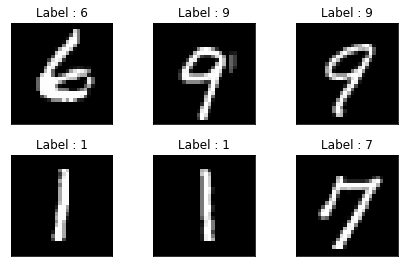

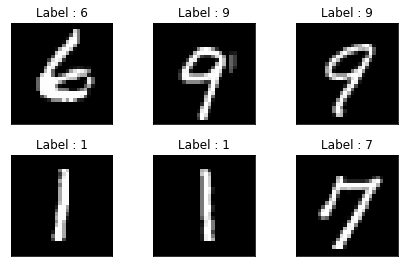

In [11]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Label : {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [12]:
# Building neural net
class Net(nn.Module):
    def __init__(self,num_classes=10):
        super(Net,self).__init__()

        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Instantiate a fully connected layer
        self.fc1 = nn.Linear(7 * 7 * 10, 100)
        self.fc2 = nn.Linear(100,num_classes)
    
    def forward(self,x):
        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7*7*10)
        x = self.fc1(x)

        # Apply the fully connected layer and return the result
        return self.fc2(x)

In [14]:
# Training nn

model = Net()
model.to(device) # transfer to GPU if available
optimizer = torch.optim.Adam(model.parameters(),lr=3e-4)
calculate_loss = nn.CrossEntropyLoss()

num_epochs = 1000

since = time.time()

gradien_vector = []
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)
    #scheduler.step()
    model.train()
    running_loss = 0.0
    tk0 = tqdm(train_loader, total=int(len(train_loader)))
    counter = 0



    # Training Code start 
    for batch_idx, data_set in enumerate(tk0):

        optimizer.zero_grad()  # Clear the old gradients from last step  
        data , labels = data_set
        data = data.to(device)
        labels = labels.to(device)
        output = model(data)   #forward
        output.to(device)
        loss = calculate_loss(output,labels) #calculate loss
        loss.backward()
        optimizer.step()

        # Training code ends



        running_loss += loss.item() * data.size(0)
        counter += 1
        tk0.set_postfix(loss=(running_loss / (counter * train_loader.batch_size)))
    
    #Gradients
    g_2 = []
    for name, param in model.named_parameters():
        if param.requires_grad and "bias" not in name:
            #print (name, param.grad.data)
            g_2.append(torch.flatten(param.grad.data))
    print(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)))
    gradien_vector.append(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)).item())

    
    # #weights
    # for name, param in model.named_parameters():
    #     if param.requires_grad:
    #         print (name, param.data)
    

time_elapsed = time.time() - since
print('\nTraining completed in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Epoch 0/999
----------


C:\Users\Rajdeep\anaconda3\lib\site-packages\ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



tensor(0.9506)
Epoch 1/999
----------



tensor(0.9284)
Epoch 2/999
----------



tensor(1.6301)
Epoch 3/999
----------



tensor(2.5801)
Epoch 4/999
----------



tensor(1.4672)
Epoch 5/999
----------



tensor(1.2569)
Epoch 6/999
----------



tensor(0.4296)
Epoch 7/999
----------



tensor(0.3366)
Epoch 8/999
----------



tensor(1.7545)
Epoch 9/999
----------



tensor(0.0634)
Epoch 10/999
----------



tensor(0.1248)
Epoch 11/999
----------



tensor(0.3467)
Epoch 12/999
----------



tensor(1.8363)
Epoch 13/999
----------



tensor(0.8379)
Epoch 14/999
----------



tensor(0.5915)
Epoch 15/999
----------



tensor(1.9123)
Epoch 16/999
----------



tensor(0.1761)
Epoch 17/999
----------



tensor(1.0490)
Epoch 18/999
----------



tensor(0.0813)
Epoch 19/999
----------



tensor(1.0034)
Epoch 20/999
----------



tensor(0.0239)
Epoch 21/999
----------



tensor(1.7553)
Epoch 22/999
----------



tensor(0.3283)
Epoch 23/999
----------



tensor(2.6457)
Epoch 24/999
----------



tensor(0.4846)
Epoch 25/999
----------



tensor(0.0849)
Epoch 26/999
----------



tensor(2.0550)
Epoch 27/999
----------



tensor(1.2742)
Epoch 28/999
----------



tensor(1.3362)
Epoch 29/999
----------



tensor(0.7671)
Epoch 30/999
----------



tensor(5.5849)
Epoch 31/999
----------



tensor(1.1256)
Epoch 32/999
----------



tensor(1.5164)
Epoch 33/999
----------



tensor(0.0614)
Epoch 34/999
----------



tensor(0.3399)
Epoch 35/999
----------



tensor(3.1526)
Epoch 36/999
----------



tensor(1.7190)
Epoch 37/999
----------



tensor(1.9872)
Epoch 38/999
----------



tensor(0.6815)
Epoch 39/999
----------



tensor(0.0545)
Epoch 40/999
----------



tensor(0.0428)
Epoch 41/999
----------



tensor(1.8488)
Epoch 42/999
----------



tensor(0.4171)
Epoch 43/999
----------



tensor(0.0304)
Epoch 44/999
----------



tensor(0.0395)
Epoch 45/999
----------



tensor(3.7309)
Epoch 46/999
----------



tensor(3.7638)
Epoch 47/999
----------



tensor(0.0130)
Epoch 48/999
----------



tensor(0.0129)
Epoch 49/999
----------



tensor(1.5514)
Epoch 50/999
----------



tensor(2.4492)
Epoch 51/999
----------



tensor(1.2674)
Epoch 52/999
----------



tensor(0.5521)
Epoch 53/999
----------



tensor(0.0980)
Epoch 54/999
----------



tensor(0.3421)
Epoch 55/999
----------



tensor(0.0566)
Epoch 56/999
----------



tensor(0.0017)
Epoch 57/999
----------



tensor(0.1920)
Epoch 58/999
----------



tensor(0.0108)
Epoch 59/999
----------



tensor(0.3567)
Epoch 60/999
----------



tensor(0.0034)
Epoch 61/999
----------



tensor(0.8277)
Epoch 62/999
----------



tensor(0.0509)
Epoch 63/999
----------



tensor(3.5464)
Epoch 64/999
----------



tensor(0.1648)
Epoch 65/999
----------



tensor(0.0181)
Epoch 66/999
----------



tensor(0.0002)
Epoch 67/999
----------



tensor(5.4310)
Epoch 68/999
----------



tensor(0.0036)
Epoch 69/999
----------



tensor(0.0116)
Epoch 70/999
----------



tensor(0.1930)
Epoch 71/999
----------



tensor(0.8636)
Epoch 72/999
----------



tensor(1.7537)
Epoch 73/999
----------



tensor(4.3393)
Epoch 74/999
----------



tensor(0.0277)
Epoch 75/999
----------



tensor(0.0005)
Epoch 76/999
----------



tensor(0.4991)
Epoch 77/999
----------



tensor(2.5417)
Epoch 78/999
----------



tensor(0.5978)
Epoch 79/999
----------



tensor(1.1930)
Epoch 80/999
----------



tensor(0.2077)
Epoch 81/999
----------



tensor(3.3926)
Epoch 82/999
----------



tensor(0.0003)
Epoch 83/999
----------



tensor(0.1016)
Epoch 84/999
----------



tensor(0.0034)
Epoch 85/999
----------



tensor(0.1741)
Epoch 86/999
----------



tensor(0.0051)
Epoch 87/999
----------



tensor(0.0360)
Epoch 88/999
----------



tensor(3.0616e-05)
Epoch 89/999
----------



tensor(0.2094)
Epoch 90/999
----------



tensor(0.0032)
Epoch 91/999
----------



tensor(0.0009)
Epoch 92/999
----------



tensor(0.0579)
Epoch 93/999
----------



tensor(0.1566)
Epoch 94/999
----------



tensor(0.0119)
Epoch 95/999
----------



tensor(7.1440)
Epoch 96/999
----------



tensor(0.0189)
Epoch 97/999
----------



tensor(0.0002)
Epoch 98/999
----------



tensor(0.0125)
Epoch 99/999
----------



tensor(0.0445)
Epoch 100/999
----------



tensor(0.0055)
Epoch 101/999
----------



tensor(7.6538)
Epoch 102/999
----------



tensor(0.0011)
Epoch 103/999
----------



tensor(0.0570)
Epoch 104/999
----------



tensor(0.0076)
Epoch 105/999
----------



tensor(0.0118)
Epoch 106/999
----------



tensor(5.3515e-06)
Epoch 107/999
----------



tensor(1.3597)
Epoch 108/999
----------



tensor(4.1408e-05)
Epoch 109/999
----------



tensor(0.2460)
Epoch 110/999
----------



tensor(1.4941e-05)
Epoch 111/999
----------



tensor(5.3230e-06)
Epoch 112/999
----------



tensor(0.0051)
Epoch 113/999
----------



tensor(0.0037)
Epoch 114/999
----------



tensor(0.0649)
Epoch 115/999
----------



tensor(0.1160)
Epoch 116/999
----------



tensor(0.2002)
Epoch 117/999
----------



tensor(0.0002)
Epoch 118/999
----------



tensor(0.5178)
Epoch 119/999
----------



tensor(0.0019)
Epoch 120/999
----------



tensor(0.9422)
Epoch 121/999
----------



tensor(0.0766)
Epoch 122/999
----------



tensor(0.0391)
Epoch 123/999
----------



tensor(0.0010)
Epoch 124/999
----------



tensor(0.3672)
Epoch 125/999
----------



tensor(0.0001)
Epoch 126/999
----------



tensor(3.7935e-05)
Epoch 127/999
----------



tensor(0.0116)
Epoch 128/999
----------



tensor(0.1114)
Epoch 129/999
----------



tensor(3.8737e-06)
Epoch 130/999
----------



tensor(0.0041)
Epoch 131/999
----------



tensor(0.0007)
Epoch 132/999
----------



tensor(0.0912)
Epoch 133/999
----------



tensor(0.0029)
Epoch 134/999
----------



tensor(6.5254e-07)
Epoch 135/999
----------



tensor(2.4268e-05)
Epoch 136/999
----------



tensor(0.0035)
Epoch 137/999
----------



tensor(0.0825)
Epoch 138/999
----------



tensor(0.0010)
Epoch 139/999
----------



tensor(2.9336e-06)
Epoch 140/999
----------



tensor(0.0146)
Epoch 141/999
----------



tensor(1.5300)
Epoch 142/999
----------



tensor(0.4670)
Epoch 143/999
----------



tensor(0.0003)
Epoch 144/999
----------



tensor(0.0047)
Epoch 145/999
----------



tensor(0.0110)
Epoch 146/999
----------



tensor(1.9461e-06)
Epoch 147/999
----------



tensor(0.0003)
Epoch 148/999
----------



tensor(2.4950)
Epoch 149/999
----------



tensor(0.1104)
Epoch 150/999
----------



tensor(0.0205)
Epoch 151/999
----------



tensor(0.0006)
Epoch 152/999
----------



tensor(1.6331e-07)
Epoch 153/999
----------



tensor(2.3746e-05)
Epoch 154/999
----------



tensor(4.0624e-06)
Epoch 155/999
----------



tensor(2.1193e-05)
Epoch 156/999
----------



tensor(0.0172)
Epoch 157/999
----------



tensor(0.0813)
Epoch 158/999
----------



tensor(0.0729)
Epoch 159/999
----------



tensor(0.0177)
Epoch 160/999
----------



tensor(0.0002)
Epoch 161/999
----------



tensor(0.0685)
Epoch 162/999
----------



tensor(0.0772)
Epoch 163/999
----------



tensor(1.6153)
Epoch 164/999
----------



tensor(0.0001)
Epoch 165/999
----------



tensor(3.7876e-09)
Epoch 166/999
----------



tensor(3.0240e-05)
Epoch 167/999
----------



tensor(0.0042)
Epoch 168/999
----------



tensor(0.0020)
Epoch 169/999
----------



tensor(1.0078e-07)
Epoch 170/999
----------



tensor(0.0255)
Epoch 171/999
----------



tensor(0.0058)
Epoch 172/999
----------



tensor(0.0040)
Epoch 173/999
----------



tensor(0.0139)
Epoch 174/999
----------



tensor(0.0073)
Epoch 175/999
----------



tensor(1.3272e-07)
Epoch 176/999
----------



tensor(0.0038)
Epoch 177/999
----------



tensor(0.0012)
Epoch 178/999
----------



tensor(0.0012)
Epoch 179/999
----------



tensor(2.7117e-05)
Epoch 180/999
----------



tensor(0.0652)
Epoch 181/999
----------



tensor(2.8154e-09)
Epoch 182/999
----------



tensor(0.0008)
Epoch 183/999
----------



tensor(0.0467)
Epoch 184/999
----------



tensor(2.1286e-08)
Epoch 185/999
----------



tensor(0.1096)
Epoch 186/999
----------



tensor(0.0554)
Epoch 187/999
----------



tensor(3.9178e-08)
Epoch 188/999
----------



tensor(0.0003)
Epoch 189/999
----------



tensor(1.0415e-07)
Epoch 190/999
----------



tensor(1.0174)
Epoch 191/999
----------



tensor(5.9183e-06)
Epoch 192/999
----------



tensor(0.0082)
Epoch 193/999
----------



tensor(0.0807)
Epoch 194/999
----------



tensor(0.0002)
Epoch 195/999
----------



tensor(2.2181)
Epoch 196/999
----------



tensor(0.2740)
Epoch 197/999
----------



tensor(0.0093)
Epoch 198/999
----------



tensor(0.0046)
Epoch 199/999
----------



tensor(0.7829)
Epoch 200/999
----------



tensor(0.0006)
Epoch 201/999
----------



tensor(0.0076)
Epoch 202/999
----------



tensor(0.0013)
Epoch 203/999
----------



tensor(0.0084)
Epoch 204/999
----------



tensor(1.6126e-07)
Epoch 205/999
----------



tensor(0.0022)
Epoch 206/999
----------



tensor(0.0009)
Epoch 207/999
----------



tensor(8.6427e-07)
Epoch 208/999
----------



tensor(0.0002)
Epoch 209/999
----------



tensor(9.3219e-05)
Epoch 210/999
----------



tensor(0.0487)
Epoch 211/999
----------



tensor(0.0030)
Epoch 212/999
----------



tensor(5.8871e-06)
Epoch 213/999
----------



tensor(3.9915e-05)
Epoch 214/999
----------



tensor(0.0009)
Epoch 215/999
----------



tensor(1.5662e-07)
Epoch 216/999
----------



tensor(8.2874e-07)
Epoch 217/999
----------



tensor(0.0007)
Epoch 218/999
----------



tensor(0.0001)
Epoch 219/999
----------



tensor(0.0051)
Epoch 220/999
----------



tensor(0.0112)
Epoch 221/999
----------



tensor(5.0021e-09)
Epoch 222/999
----------



tensor(1.0987e-06)
Epoch 223/999
----------



tensor(0.0011)
Epoch 224/999
----------



tensor(5.9973e-06)
Epoch 225/999
----------



tensor(0.0044)
Epoch 226/999
----------



tensor(0.2957)
Epoch 227/999
----------



tensor(0.0008)
Epoch 228/999
----------



tensor(9.2935)
Epoch 229/999
----------



tensor(0.0032)
Epoch 230/999
----------



tensor(5.0503e-07)
Epoch 231/999
----------



tensor(8.8108e-06)
Epoch 232/999
----------



tensor(0.0152)
Epoch 233/999
----------



tensor(0.0395)
Epoch 234/999
----------



tensor(1.4726e-06)
Epoch 235/999
----------



tensor(0.0004)
Epoch 236/999
----------



tensor(1.6326e-06)
Epoch 237/999
----------



tensor(4.7356)
Epoch 238/999
----------



tensor(0.0016)
Epoch 239/999
----------



tensor(7.5417e-08)
Epoch 240/999
----------



tensor(0.0015)
Epoch 241/999
----------



tensor(2.1486)
Epoch 242/999
----------



tensor(12.7805)
Epoch 243/999
----------



tensor(3.4010e-07)
Epoch 244/999
----------



tensor(1.2064e-05)
Epoch 245/999
----------



tensor(4.7372e-05)
Epoch 246/999
----------



tensor(0.0002)
Epoch 247/999
----------



tensor(0.0003)
Epoch 248/999
----------



tensor(1.7679)
Epoch 249/999
----------



tensor(0.0002)
Epoch 250/999
----------



tensor(7.0779e-07)
Epoch 251/999
----------



tensor(0.0017)
Epoch 252/999
----------



tensor(0.0002)
Epoch 253/999
----------



tensor(0.0792)
Epoch 254/999
----------



tensor(0.0003)
Epoch 255/999
----------



tensor(7.0239e-08)
Epoch 256/999
----------



tensor(1.0179)
Epoch 257/999
----------



tensor(2.9813e-05)
Epoch 258/999
----------



tensor(0.0559)
Epoch 259/999
----------



tensor(3.6915e-09)
Epoch 260/999
----------



tensor(9.4919e-07)
Epoch 261/999
----------



tensor(0.0640)
Epoch 262/999
----------



tensor(6.8288e-08)
Epoch 263/999
----------



tensor(1.6998e-07)
Epoch 264/999
----------



tensor(0.7931)
Epoch 265/999
----------



tensor(0.1177)
Epoch 266/999
----------



tensor(0.0002)
Epoch 267/999
----------



tensor(0.0460)
Epoch 268/999
----------



tensor(11.4196)
Epoch 269/999
----------



tensor(1.3739e-06)
Epoch 270/999
----------



tensor(0.0214)
Epoch 271/999
----------



tensor(3.9957e-08)
Epoch 272/999
----------



tensor(8.1724e-09)
Epoch 273/999
----------



tensor(2.8433e-06)
Epoch 274/999
----------



tensor(2.1504e-09)
Epoch 275/999
----------



tensor(0.0064)
Epoch 276/999
----------



tensor(1.3701e-05)
Epoch 277/999
----------



tensor(1.0135e-07)
Epoch 278/999
----------



tensor(0.0085)
Epoch 279/999
----------



tensor(1.7750e-08)
Epoch 280/999
----------



tensor(0.0004)
Epoch 281/999
----------



tensor(4.6777e-07)
Epoch 282/999
----------



tensor(0.0002)
Epoch 283/999
----------



tensor(2.0957e-07)
Epoch 284/999
----------



tensor(2.8586e-08)
Epoch 285/999
----------



tensor(4.4179e-09)
Epoch 286/999
----------



tensor(7.1551e-09)
Epoch 287/999
----------



tensor(0.6438)
Epoch 288/999
----------



tensor(0.0264)
Epoch 289/999
----------



tensor(0.0002)
Epoch 290/999
----------



tensor(0.0067)
Epoch 291/999
----------



tensor(0.0003)
Epoch 292/999
----------



tensor(3.6488e-06)
Epoch 293/999
----------



tensor(0.0047)
Epoch 294/999
----------



tensor(0.0417)
Epoch 295/999
----------



tensor(0.0478)
Epoch 296/999
----------



tensor(9.4992e-13)
Epoch 297/999
----------



tensor(5.5497e-05)
Epoch 298/999
----------



tensor(0.7521)
Epoch 299/999
----------



tensor(5.5097e-09)
Epoch 300/999
----------



tensor(0.4013)
Epoch 301/999
----------



tensor(0.0016)
Epoch 302/999
----------



tensor(0.0321)
Epoch 303/999
----------



tensor(6.6896e-07)
Epoch 304/999
----------



tensor(3.0241e-05)
Epoch 305/999
----------



tensor(6.9052e-05)
Epoch 306/999
----------



tensor(7.8435e-05)
Epoch 307/999
----------



tensor(1.9756e-05)
Epoch 308/999
----------



tensor(0.0554)
Epoch 309/999
----------



tensor(0.0004)
Epoch 310/999
----------



tensor(0.0981)
Epoch 311/999
----------



tensor(3.2746e-05)
Epoch 312/999
----------



tensor(1.4679e-05)
Epoch 313/999
----------



tensor(1.1662e-10)
Epoch 314/999
----------



tensor(5.8464e-06)
Epoch 315/999
----------



tensor(0.0675)
Epoch 316/999
----------



tensor(0.0006)
Epoch 317/999
----------



tensor(0.0002)
Epoch 318/999
----------



tensor(1.0635e-06)
Epoch 319/999
----------



tensor(4.4304e-09)
Epoch 320/999
----------



tensor(9.0170e-08)
Epoch 321/999
----------



tensor(0.0080)
Epoch 322/999
----------



tensor(1.7443e-09)
Epoch 323/999
----------



tensor(5.0167)
Epoch 324/999
----------



tensor(0.2422)
Epoch 325/999
----------



tensor(0.0006)
Epoch 326/999
----------



tensor(1.2540e-06)
Epoch 327/999
----------



tensor(0.0004)
Epoch 328/999
----------



tensor(4.1045e-08)
Epoch 329/999
----------



tensor(0.0026)
Epoch 330/999
----------



tensor(2.0830e-08)
Epoch 331/999
----------



tensor(0.0414)
Epoch 332/999
----------



tensor(0.0002)
Epoch 333/999
----------



tensor(0.0003)
Epoch 334/999
----------



tensor(1.4478)
Epoch 335/999
----------



tensor(4.2384e-05)
Epoch 336/999
----------



tensor(0.8361)
Epoch 337/999
----------



tensor(0.3135)
Epoch 338/999
----------



tensor(0.8971)
Epoch 339/999
----------



tensor(5.7559e-07)
Epoch 340/999
----------



tensor(0.0008)
Epoch 341/999
----------



tensor(5.9530e-09)
Epoch 342/999
----------



tensor(5.8329e-07)
Epoch 343/999
----------



tensor(0.1707)
Epoch 344/999
----------



tensor(0.0014)
Epoch 345/999
----------



tensor(7.7028e-05)
Epoch 346/999
----------



tensor(7.8096e-05)
Epoch 347/999
----------



tensor(7.5910)
Epoch 348/999
----------



tensor(4.6645e-06)
Epoch 349/999
----------



tensor(3.1172e-09)
Epoch 350/999
----------



tensor(0.0509)
Epoch 351/999
----------



tensor(1.6512e-11)
Epoch 352/999
----------



tensor(0.0203)
Epoch 353/999
----------



tensor(0.0008)
Epoch 354/999
----------



tensor(0.0004)
Epoch 355/999
----------



tensor(0.1722)
Epoch 356/999
----------



tensor(5.3231)
Epoch 357/999
----------



tensor(3.3765e-06)
Epoch 358/999
----------



tensor(0.0002)
Epoch 359/999
----------



tensor(2.0889)
Epoch 360/999
----------



tensor(0.0030)
Epoch 361/999
----------



tensor(3.9608e-09)
Epoch 362/999
----------



tensor(0.0011)
Epoch 363/999
----------



tensor(0.0004)
Epoch 364/999
----------



tensor(1.1392e-08)
Epoch 365/999
----------



tensor(0.0135)
Epoch 366/999
----------



tensor(0.0043)
Epoch 367/999
----------



tensor(0.0005)
Epoch 368/999
----------



tensor(0.0100)
Epoch 369/999
----------



tensor(5.6348e-07)
Epoch 370/999
----------



tensor(4.6336e-06)
Epoch 371/999
----------



tensor(0.0030)
Epoch 372/999
----------



tensor(0.0003)
Epoch 373/999
----------



tensor(1.4676e-10)
Epoch 374/999
----------



tensor(1.9286)
Epoch 375/999
----------



tensor(4.9451e-07)
Epoch 376/999
----------



tensor(3.2563e-06)
Epoch 377/999
----------



tensor(3.8481e-09)
Epoch 378/999
----------



tensor(0.1047)
Epoch 379/999
----------



tensor(7.0119e-08)
Epoch 380/999
----------



tensor(1.3623e-08)
Epoch 381/999
----------



tensor(1.2397e-09)
Epoch 382/999
----------



tensor(4.9481e-08)
Epoch 383/999
----------



tensor(0.0002)
Epoch 384/999
----------



tensor(0.0177)
Epoch 385/999
----------



tensor(5.7705e-12)
Epoch 386/999
----------



tensor(8.9595e-08)
Epoch 387/999
----------



tensor(6.3947e-05)
Epoch 388/999
----------



tensor(1.7220e-08)
Epoch 389/999
----------



tensor(0.0133)
Epoch 390/999
----------



tensor(0.0035)
Epoch 391/999
----------



tensor(2.7439)
Epoch 392/999
----------



tensor(0.0099)
Epoch 393/999
----------



tensor(4.1278)
Epoch 394/999
----------



tensor(0.0004)
Epoch 395/999
----------



tensor(0.0062)
Epoch 396/999
----------



tensor(0.0011)
Epoch 397/999
----------



tensor(6.7919e-05)
Epoch 398/999
----------



tensor(0.2326)
Epoch 399/999
----------



tensor(7.6665e-10)
Epoch 400/999
----------



tensor(3.1425e-08)
Epoch 401/999
----------



tensor(7.6869)
Epoch 402/999
----------



tensor(5.5763e-05)
Epoch 403/999
----------



tensor(3.6208e-08)
Epoch 404/999
----------



tensor(3.4261e-07)
Epoch 405/999
----------



tensor(3.2547e-08)
Epoch 406/999
----------



tensor(8.2267e-07)
Epoch 407/999
----------



tensor(1.3851e-09)
Epoch 408/999
----------



tensor(5.2640e-05)
Epoch 409/999
----------



tensor(1.2478e-05)
Epoch 410/999
----------



tensor(2.2666e-07)
Epoch 411/999
----------



tensor(0.0693)
Epoch 412/999
----------



tensor(0.0104)
Epoch 413/999
----------



tensor(3.6546e-06)
Epoch 414/999
----------



tensor(0.0046)
Epoch 415/999
----------



tensor(0.2552)
Epoch 416/999
----------



tensor(0.0002)
Epoch 417/999
----------



tensor(8.1455)
Epoch 418/999
----------



tensor(3.5656e-07)
Epoch 419/999
----------



tensor(5.7171e-06)
Epoch 420/999
----------



tensor(4.7911e-05)
Epoch 421/999
----------



tensor(2.5942e-05)
Epoch 422/999
----------



tensor(1.5009e-07)
Epoch 423/999
----------



tensor(2.5575e-08)
Epoch 424/999
----------



tensor(4.6889e-06)
Epoch 425/999
----------



tensor(9.6287e-05)
Epoch 426/999
----------



tensor(4.1261e-07)
Epoch 427/999
----------



tensor(0.1583)
Epoch 428/999
----------



tensor(6.1127e-07)
Epoch 429/999
----------



tensor(1.3578e-05)
Epoch 430/999
----------



tensor(0.1923)
Epoch 431/999
----------



tensor(0.0114)
Epoch 432/999
----------



tensor(0.2453)
Epoch 433/999
----------



tensor(3.8352e-06)
Epoch 434/999
----------



tensor(6.3970e-09)
Epoch 435/999
----------



tensor(1.0802e-09)
Epoch 436/999
----------



tensor(0.0034)
Epoch 437/999
----------



tensor(0.0271)
Epoch 438/999
----------



tensor(1.1947e-08)
Epoch 439/999
----------



tensor(8.1832e-05)
Epoch 440/999
----------



tensor(0.7112)
Epoch 441/999
----------



tensor(6.5681e-06)
Epoch 442/999
----------



tensor(0.0029)
Epoch 443/999
----------



tensor(1.3039e-08)
Epoch 444/999
----------



tensor(0.0101)
Epoch 445/999
----------



tensor(1.0764e-06)
Epoch 446/999
----------



tensor(0.0006)
Epoch 447/999
----------



tensor(0.0003)
Epoch 448/999
----------



tensor(0.0019)
Epoch 449/999
----------



tensor(0.0358)
Epoch 450/999
----------



tensor(4.3373e-06)
Epoch 451/999
----------



tensor(0.0002)
Epoch 452/999
----------



tensor(0.8488)
Epoch 453/999
----------



tensor(0.0001)
Epoch 454/999
----------



tensor(2.8126e-07)
Epoch 455/999
----------



tensor(2.0179e-06)
Epoch 456/999
----------



tensor(1.0783e-05)
Epoch 457/999
----------



tensor(1.4831e-06)
Epoch 458/999
----------



tensor(3.0001e-08)
Epoch 459/999
----------



tensor(2.1149e-08)
Epoch 460/999
----------



tensor(0.7335)
Epoch 461/999
----------



tensor(1.1627e-09)
Epoch 462/999
----------



tensor(0.0011)
Epoch 463/999
----------



tensor(1.6575e-07)
Epoch 464/999
----------



tensor(1.5099e-05)
Epoch 465/999
----------



tensor(2.8462e-07)
Epoch 466/999
----------



tensor(6.2324e-05)
Epoch 467/999
----------



tensor(4.3653e-12)
Epoch 468/999
----------



tensor(0.0002)
Epoch 469/999
----------



tensor(5.2796e-08)
Epoch 470/999
----------



tensor(2.1246e-07)
Epoch 471/999
----------



tensor(18.5820)
Epoch 472/999
----------



tensor(5.6244e-10)
Epoch 473/999
----------



tensor(0.0004)
Epoch 474/999
----------



tensor(0.0066)
Epoch 475/999
----------



tensor(6.2874e-06)
Epoch 476/999
----------



tensor(1.6485e-05)
Epoch 477/999
----------



tensor(0.0519)
Epoch 478/999
----------



tensor(7.2427)
Epoch 479/999
----------



tensor(0.0033)
Epoch 480/999
----------



tensor(7.8382e-15)
Epoch 481/999
----------



tensor(1.6569e-14)
Epoch 482/999
----------



tensor(8.5964e-06)
Epoch 483/999
----------



tensor(8.7463e-08)
Epoch 484/999
----------



tensor(1.1489e-08)
Epoch 485/999
----------



tensor(0.0002)
Epoch 486/999
----------



tensor(1.2931e-06)
Epoch 487/999
----------



tensor(9.9281e-11)
Epoch 488/999
----------



tensor(1.7402e-05)
Epoch 489/999
----------



tensor(3.7014e-07)
Epoch 490/999
----------



tensor(0.0002)
Epoch 491/999
----------



tensor(3.0426e-05)
Epoch 492/999
----------



tensor(9.7036e-08)
Epoch 493/999
----------



tensor(1.7849e-05)
Epoch 494/999
----------



tensor(5.5986e-07)
Epoch 495/999
----------



tensor(2.0702e-07)
Epoch 496/999
----------



tensor(4.9828e-13)
Epoch 497/999
----------



tensor(4.7675e-10)
Epoch 498/999
----------



tensor(5.7886e-06)
Epoch 499/999
----------



tensor(9.8170e-09)
Epoch 500/999
----------



tensor(6.0311e-10)
Epoch 501/999
----------



tensor(0.0001)
Epoch 502/999
----------



tensor(4.1864e-07)
Epoch 503/999
----------



tensor(3.7898e-06)
Epoch 504/999
----------



tensor(9.3210e-05)
Epoch 505/999
----------



tensor(8.8621e-08)
Epoch 506/999
----------



tensor(5.1737e-12)
Epoch 507/999
----------



tensor(0.0063)
Epoch 508/999
----------



tensor(3.3809e-08)
Epoch 509/999
----------



tensor(1.3490)
Epoch 510/999
----------



tensor(0.0310)
Epoch 511/999
----------



tensor(7.8529e-07)
Epoch 512/999
----------



tensor(4.9695e-08)
Epoch 513/999
----------



tensor(7.2025e-14)
Epoch 514/999
----------



tensor(0.0012)
Epoch 515/999
----------



tensor(9.3376e-08)
Epoch 516/999
----------



tensor(6.7974e-12)
Epoch 517/999
----------



tensor(1.6709e-08)
Epoch 518/999
----------



tensor(12.0990)
Epoch 519/999
----------



tensor(0.0036)
Epoch 520/999
----------



tensor(2.3663e-06)
Epoch 521/999
----------



tensor(2.0331e-10)
Epoch 522/999
----------



tensor(2.4097e-06)
Epoch 523/999
----------



tensor(7.6195e-06)
Epoch 524/999
----------



tensor(7.8131e-12)
Epoch 525/999
----------



tensor(3.3500e-11)
Epoch 526/999
----------



tensor(0.0003)
Epoch 527/999
----------



tensor(1.8607e-08)
Epoch 528/999
----------



tensor(1.1600e-05)
Epoch 529/999
----------



tensor(0.0075)
Epoch 530/999
----------



tensor(0.0002)
Epoch 531/999
----------



tensor(5.9576e-05)
Epoch 532/999
----------



tensor(9.0623e-06)
Epoch 533/999
----------



tensor(2.8469e-05)
Epoch 534/999
----------



tensor(4.2301e-06)
Epoch 535/999
----------



tensor(1.1717e-06)
Epoch 536/999
----------



tensor(7.2264e-06)
Epoch 537/999
----------



tensor(0.0085)
Epoch 538/999
----------



tensor(1.5024e-08)
Epoch 539/999
----------



tensor(0.0004)
Epoch 540/999
----------



tensor(2.4732e-08)
Epoch 541/999
----------



tensor(6.7588e-09)
Epoch 542/999
----------



tensor(3.4516e-09)
Epoch 543/999
----------



tensor(1.4007e-05)
Epoch 544/999
----------



tensor(1.1810e-07)
Epoch 545/999
----------



tensor(3.1846e-10)
Epoch 546/999
----------



tensor(2.8131e-07)
Epoch 547/999
----------



tensor(1.9558e-07)
Epoch 548/999
----------



tensor(1.1106e-12)
Epoch 549/999
----------



tensor(0.0184)
Epoch 550/999
----------



tensor(8.3491e-06)
Epoch 551/999
----------



tensor(0.0004)
Epoch 552/999
----------



tensor(0.0035)
Epoch 553/999
----------



tensor(0.0313)
Epoch 554/999
----------



tensor(4.7144e-09)
Epoch 555/999
----------



tensor(4.4512e-09)
Epoch 556/999
----------



tensor(3.6065e-09)
Epoch 557/999
----------



tensor(0.0484)
Epoch 558/999
----------



tensor(0.0006)
Epoch 559/999
----------



tensor(4.8885e-08)
Epoch 560/999
----------



tensor(1.1929e-15)
Epoch 561/999
----------



tensor(0.0001)
Epoch 562/999
----------



tensor(1.0373e-09)
Epoch 563/999
----------



tensor(0.0010)
Epoch 564/999
----------



tensor(3.2207e-11)
Epoch 565/999
----------



tensor(0.0006)
Epoch 566/999
----------



tensor(15.2737)
Epoch 567/999
----------



tensor(1.2881e-08)
Epoch 568/999
----------



tensor(8.2069e-15)
Epoch 569/999
----------



tensor(0.1044)
Epoch 570/999
----------



tensor(8.9088)
Epoch 571/999
----------



tensor(0.0009)
Epoch 572/999
----------



tensor(0.3657)
Epoch 573/999
----------



tensor(1.4466e-11)
Epoch 574/999
----------



tensor(1.0991e-07)
Epoch 575/999
----------



tensor(5.7439e-06)
Epoch 576/999
----------



tensor(0.0012)
Epoch 577/999
----------



tensor(4.5465e-05)
Epoch 578/999
----------



tensor(5.3781e-05)
Epoch 579/999
----------



tensor(5.4396e-07)
Epoch 580/999
----------



tensor(2.7704e-10)
Epoch 581/999
----------



tensor(9.2987e-09)
Epoch 582/999
----------



tensor(2.3290e-07)
Epoch 583/999
----------



tensor(1.3337e-10)
Epoch 584/999
----------



tensor(4.0241e-07)
Epoch 585/999
----------



tensor(1.2823e-16)
Epoch 586/999
----------



tensor(9.7856e-10)
Epoch 587/999
----------



tensor(0.0014)
Epoch 588/999
----------



tensor(4.9196e-06)
Epoch 589/999
----------



tensor(1.6062e-05)
Epoch 590/999
----------



tensor(4.3331e-12)
Epoch 591/999
----------



tensor(0.0017)
Epoch 592/999
----------



tensor(4.8461e-07)
Epoch 593/999
----------



tensor(2.0929e-08)
Epoch 594/999
----------



tensor(4.8361e-14)
Epoch 595/999
----------



tensor(4.1217e-07)
Epoch 596/999
----------



tensor(7.5416e-05)
Epoch 597/999
----------



tensor(3.4760e-06)
Epoch 598/999
----------



tensor(0.0032)
Epoch 599/999
----------



tensor(3.2560e-05)
Epoch 600/999
----------



tensor(0.0096)
Epoch 601/999
----------



tensor(1.2665e-09)
Epoch 602/999
----------



tensor(1.3658e-07)
Epoch 603/999
----------



tensor(0.0001)
Epoch 604/999
----------



tensor(2.9669e-05)
Epoch 605/999
----------



tensor(8.3683e-05)
Epoch 606/999
----------



tensor(0.0178)
Epoch 607/999
----------



tensor(8.4982e-10)
Epoch 608/999
----------



tensor(8.6053e-06)
Epoch 609/999
----------



tensor(0.0218)
Epoch 610/999
----------



tensor(3.5262e-07)
Epoch 611/999
----------



tensor(2.7612e-13)
Epoch 612/999
----------



tensor(0.0008)
Epoch 613/999
----------



tensor(3.1860e-05)
Epoch 614/999
----------



tensor(4.3051e-10)
Epoch 615/999
----------



tensor(2.2916e-08)
Epoch 616/999
----------



tensor(2.8169e-09)
Epoch 617/999
----------



tensor(7.6000e-08)
Epoch 618/999
----------



tensor(6.7478e-08)
Epoch 619/999
----------



tensor(8.1299e-05)
Epoch 620/999
----------



tensor(2.7781e-07)
Epoch 621/999
----------



tensor(0.0555)
Epoch 622/999
----------



tensor(0.0012)
Epoch 623/999
----------



tensor(3.3896e-07)
Epoch 624/999
----------



tensor(6.2591e-08)
Epoch 625/999
----------



tensor(0.0022)
Epoch 626/999
----------



tensor(0.0004)
Epoch 627/999
----------



tensor(2.5783e-05)
Epoch 628/999
----------



tensor(9.3284)
Epoch 629/999
----------



tensor(3.4642e-07)
Epoch 630/999
----------



tensor(7.2824e-05)
Epoch 631/999
----------



tensor(2.2897e-13)
Epoch 632/999
----------



tensor(2.4040e-07)
Epoch 633/999
----------



tensor(1.0739e-08)
Epoch 634/999
----------



tensor(6.6859e-05)
Epoch 635/999
----------



tensor(1.4270e-08)
Epoch 636/999
----------



tensor(1.0539e-08)
Epoch 637/999
----------



tensor(1.4052e-09)
Epoch 638/999
----------



tensor(3.9443e-11)
Epoch 639/999
----------



tensor(4.4928e-10)
Epoch 640/999
----------



tensor(5.8964e-07)
Epoch 641/999
----------



tensor(7.2518e-10)
Epoch 642/999
----------



tensor(1.3974e-06)
Epoch 643/999
----------



tensor(0.0001)
Epoch 644/999
----------



tensor(5.7190e-11)
Epoch 645/999
----------



tensor(0.0871)
Epoch 646/999
----------



tensor(4.1250e-05)
Epoch 647/999
----------



tensor(1.4218e-07)
Epoch 648/999
----------



tensor(1.1390e-11)
Epoch 649/999
----------



tensor(1.5507e-10)
Epoch 650/999
----------



tensor(7.2155e-10)
Epoch 651/999
----------



tensor(0.0003)
Epoch 652/999
----------



tensor(0.0001)
Epoch 653/999
----------



tensor(8.2290e-09)
Epoch 654/999
----------



tensor(1.0302e-06)
Epoch 655/999
----------



tensor(4.1172e-10)
Epoch 656/999
----------



tensor(1.7091e-07)
Epoch 657/999
----------



tensor(0.0013)
Epoch 658/999
----------



tensor(2.3927e-05)
Epoch 659/999
----------



tensor(2.7328e-09)
Epoch 660/999
----------



tensor(5.7820e-05)
Epoch 661/999
----------



tensor(0.0061)
Epoch 662/999
----------



tensor(1.8084e-14)
Epoch 663/999
----------



tensor(1.0439e-07)
Epoch 664/999
----------



tensor(8.6447e-13)
Epoch 665/999
----------



tensor(0.1641)
Epoch 666/999
----------



tensor(9.9463e-08)
Epoch 667/999
----------



tensor(8.6365e-07)
Epoch 668/999
----------



tensor(0.0007)
Epoch 669/999
----------



tensor(4.5158e-05)
Epoch 670/999
----------



tensor(2.1412e-06)
Epoch 671/999
----------



tensor(0.0044)
Epoch 672/999
----------



tensor(0.0196)
Epoch 673/999
----------



tensor(1.4313e-05)
Epoch 674/999
----------



tensor(8.3689e-11)
Epoch 675/999
----------



tensor(0.0022)
Epoch 676/999
----------



tensor(0.0024)
Epoch 677/999
----------



tensor(7.6047e-11)
Epoch 678/999
----------



tensor(9.2432e-05)
Epoch 679/999
----------



tensor(1.4882)
Epoch 680/999
----------



tensor(4.1077e-17)
Epoch 681/999
----------



tensor(8.2057e-10)
Epoch 682/999
----------



tensor(1.5248e-15)
Epoch 683/999
----------



tensor(0.0160)
Epoch 684/999
----------



tensor(0.0504)
Epoch 685/999
----------



tensor(6.6860e-10)
Epoch 686/999
----------



tensor(2.6901)
Epoch 687/999
----------



tensor(15.0528)
Epoch 688/999
----------



tensor(1.7262e-10)
Epoch 689/999
----------



tensor(0.0004)
Epoch 690/999
----------



tensor(8.5068e-11)
Epoch 691/999
----------



tensor(5.5990e-07)
Epoch 692/999
----------



tensor(0.0100)
Epoch 693/999
----------



tensor(9.6970e-07)
Epoch 694/999
----------



tensor(2.6199e-10)
Epoch 695/999
----------



tensor(1.2911e-06)
Epoch 696/999
----------



tensor(1.7648e-05)
Epoch 697/999
----------



tensor(7.9255e-11)
Epoch 698/999
----------



tensor(3.1970e-21)
Epoch 699/999
----------



tensor(0.0001)
Epoch 700/999
----------



tensor(8.7125e-05)
Epoch 701/999
----------



tensor(3.3304e-09)
Epoch 702/999
----------



tensor(2.9772e-08)
Epoch 703/999
----------



tensor(4.2257e-11)
Epoch 704/999
----------



tensor(0.0083)
Epoch 705/999
----------



tensor(0.0005)
Epoch 706/999
----------



tensor(6.8500e-10)
Epoch 707/999
----------



tensor(0.0048)
Epoch 708/999
----------



tensor(1.0225e-06)
Epoch 709/999
----------



tensor(7.4377e-05)
Epoch 710/999
----------



tensor(1.4792e-06)
Epoch 711/999
----------



tensor(4.0531e-05)
Epoch 712/999
----------



tensor(3.7845e-10)
Epoch 713/999
----------



tensor(5.7130e-11)
Epoch 714/999
----------



tensor(0.0002)
Epoch 715/999
----------



tensor(3.2051e-07)
Epoch 716/999
----------



tensor(8.6016e-05)
Epoch 717/999
----------



tensor(1.7324e-07)
Epoch 718/999
----------



tensor(1.4452e-10)
Epoch 719/999
----------



tensor(2.7427e-09)
Epoch 720/999
----------



tensor(4.1803e-11)
Epoch 721/999
----------



tensor(0.0761)
Epoch 722/999
----------



tensor(1.2037e-12)
Epoch 723/999
----------



tensor(2.9776e-13)
Epoch 724/999
----------



tensor(4.1436e-10)
Epoch 725/999
----------



tensor(5.6057e-06)
Epoch 726/999
----------



tensor(0.0003)
Epoch 727/999
----------



tensor(1.9219e-06)
Epoch 728/999
----------



tensor(1.1366e-07)
Epoch 729/999
----------



tensor(4.8964e-06)
Epoch 730/999
----------



tensor(3.8849e-12)
Epoch 731/999
----------



tensor(0.0282)
Epoch 732/999
----------



tensor(3.8019e-18)
Epoch 733/999
----------



tensor(0.0005)
Epoch 734/999
----------



tensor(1.0332e-08)
Epoch 735/999
----------



tensor(1.3844e-16)
Epoch 736/999
----------



tensor(9.7633e-07)
Epoch 737/999
----------



tensor(7.7554e-11)
Epoch 738/999
----------



tensor(12.4634)
Epoch 739/999
----------



tensor(0.2079)
Epoch 740/999
----------



tensor(12.5535)
Epoch 741/999
----------



tensor(1.2643e-16)
Epoch 742/999
----------



tensor(3.8189e-14)
Epoch 743/999
----------



tensor(4.4419e-08)
Epoch 744/999
----------



tensor(0.0005)
Epoch 745/999
----------



tensor(7.9952e-12)
Epoch 746/999
----------



tensor(1.6733e-14)
Epoch 747/999
----------



tensor(9.3805e-09)
Epoch 748/999
----------



tensor(1.9854e-10)
Epoch 749/999
----------



tensor(0.0004)
Epoch 750/999
----------



tensor(7.0616e-07)
Epoch 751/999
----------



tensor(1.2032e-07)
Epoch 752/999
----------



tensor(1.8471e-17)
Epoch 753/999
----------



tensor(4.3239e-19)
Epoch 754/999
----------



tensor(0.0002)
Epoch 755/999
----------



tensor(2.1941e-06)
Epoch 756/999
----------



tensor(7.4630e-13)
Epoch 757/999
----------



tensor(0.0002)
Epoch 758/999
----------



tensor(0.0002)
Epoch 759/999
----------



tensor(0.0001)
Epoch 760/999
----------



tensor(1.2338e-06)
Epoch 761/999
----------



tensor(7.2324e-11)
Epoch 762/999
----------



tensor(0.0206)
Epoch 763/999
----------



tensor(1.5964)
Epoch 764/999
----------



tensor(1.4937e-17)
Epoch 765/999
----------



tensor(2.0141e-06)
Epoch 766/999
----------



tensor(1.1590e-05)
Epoch 767/999
----------



tensor(2.6773e-10)
Epoch 768/999
----------



tensor(1.2135e-07)
Epoch 769/999
----------



tensor(2.2154e-11)
Epoch 770/999
----------



tensor(1.4586e-09)
Epoch 771/999
----------



tensor(2.1738e-05)
Epoch 772/999
----------



tensor(0.0287)
Epoch 773/999
----------



tensor(0.0021)
Epoch 774/999
----------



tensor(0.0010)
Epoch 775/999
----------



tensor(3.1870e-13)
Epoch 776/999
----------



tensor(6.8676e-14)
Epoch 777/999
----------



tensor(0.0121)
Epoch 778/999
----------



tensor(5.1353e-08)
Epoch 779/999
----------



tensor(2.9972e-08)
Epoch 780/999
----------



tensor(5.7850)
Epoch 781/999
----------



tensor(5.7847e-13)
Epoch 782/999
----------



tensor(0.0005)
Epoch 783/999
----------



tensor(1.3335e-10)
Epoch 784/999
----------



tensor(0.0005)
Epoch 785/999
----------



tensor(1.1587)
Epoch 786/999
----------



tensor(9.2564e-14)
Epoch 787/999
----------



tensor(2.0972e-07)
Epoch 788/999
----------



tensor(2.0200e-07)
Epoch 789/999
----------



tensor(2.9914e-12)
Epoch 790/999
----------



tensor(0.0001)
Epoch 791/999
----------



tensor(5.1306e-20)
Epoch 792/999
----------



tensor(1.7156e-10)
Epoch 793/999
----------



tensor(1.1233e-05)
Epoch 794/999
----------



tensor(3.4945e-09)
Epoch 795/999
----------



tensor(1.2107e-10)
Epoch 796/999
----------



tensor(8.6473e-07)
Epoch 797/999
----------



tensor(8.0470e-07)
Epoch 798/999
----------



tensor(4.0601e-06)
Epoch 799/999
----------



tensor(1.3843e-10)
Epoch 800/999
----------



tensor(6.8927e-05)
Epoch 801/999
----------



tensor(0.0891)
Epoch 802/999
----------



tensor(4.7152e-07)
Epoch 803/999
----------



tensor(1.9531e-05)
Epoch 804/999
----------



tensor(9.4963e-06)
Epoch 805/999
----------



tensor(8.6493e-05)
Epoch 806/999
----------



tensor(2.6949e-07)
Epoch 807/999
----------



tensor(9.4715e-09)
Epoch 808/999
----------



tensor(1.5059e-06)
Epoch 809/999
----------



tensor(0.0019)
Epoch 810/999
----------



tensor(0.0010)
Epoch 811/999
----------



tensor(8.5319e-07)
Epoch 812/999
----------



tensor(1.3920e-05)
Epoch 813/999
----------



tensor(6.1573e-08)
Epoch 814/999
----------



tensor(7.0525e-12)
Epoch 815/999
----------



tensor(3.8086e-07)
Epoch 816/999
----------



tensor(12.3102)
Epoch 817/999
----------



tensor(1.4028e-15)
Epoch 818/999
----------



tensor(4.4637e-05)
Epoch 819/999
----------



tensor(1.4514e-14)
Epoch 820/999
----------



tensor(0.0002)
Epoch 821/999
----------



tensor(3.3924e-19)
Epoch 822/999
----------



tensor(7.3647e-10)
Epoch 823/999
----------



tensor(2.4492e-12)
Epoch 824/999
----------



tensor(4.3287e-06)
Epoch 825/999
----------



tensor(6.3954e-07)
Epoch 826/999
----------



tensor(2.7053e-09)
Epoch 827/999
----------



tensor(0.0214)
Epoch 828/999
----------



tensor(3.7673e-17)
Epoch 829/999
----------



tensor(6.4714e-06)
Epoch 830/999
----------



tensor(0.0012)
Epoch 831/999
----------



tensor(1.8605e-15)
Epoch 832/999
----------



tensor(0.0026)
Epoch 833/999
----------



tensor(6.1940e-06)
Epoch 834/999
----------



tensor(9.6576e-07)
Epoch 835/999
----------



tensor(1.0157e-07)
Epoch 836/999
----------



tensor(3.0073e-13)
Epoch 837/999
----------



tensor(0.)
Epoch 838/999
----------



tensor(3.7445e-06)
Epoch 839/999
----------



tensor(4.6086e-09)
Epoch 840/999
----------



tensor(6.1067e-11)
Epoch 841/999
----------



tensor(1.3545e-12)
Epoch 842/999
----------



tensor(3.8982e-06)
Epoch 843/999
----------



tensor(3.1399e-08)
Epoch 844/999
----------



tensor(7.4258e-06)
Epoch 845/999
----------



tensor(5.4963e-10)
Epoch 846/999
----------



tensor(0.0005)
Epoch 847/999
----------



tensor(16.6499)
Epoch 848/999
----------



tensor(5.0892e-09)
Epoch 849/999
----------



tensor(2.6418e-05)
Epoch 850/999
----------



tensor(12.7180)
Epoch 851/999
----------



tensor(0.0093)
Epoch 852/999
----------



tensor(4.9975e-05)
Epoch 853/999
----------



tensor(8.0107e-06)
Epoch 854/999
----------



tensor(0.4482)
Epoch 855/999
----------



tensor(8.7726e-09)
Epoch 856/999
----------



tensor(0.0492)
Epoch 857/999
----------



tensor(0.6811)
Epoch 858/999
----------



tensor(1.3866e-11)
Epoch 859/999
----------



tensor(0.3652)
Epoch 860/999
----------



tensor(8.2660e-07)
Epoch 861/999
----------



tensor(3.9007e-09)
Epoch 862/999
----------



tensor(2.4842e-06)
Epoch 863/999
----------



tensor(8.9615e-05)
Epoch 864/999
----------



tensor(0.0001)
Epoch 865/999
----------



tensor(7.0985e-16)
Epoch 866/999
----------



tensor(2.9156e-06)
Epoch 867/999
----------



tensor(1.8064e-10)
Epoch 868/999
----------



tensor(4.0694e-14)
Epoch 869/999
----------



tensor(9.9796e-13)
Epoch 870/999
----------



tensor(7.0611e-08)
Epoch 871/999
----------



tensor(0.0080)
Epoch 872/999
----------



tensor(4.5043e-13)
Epoch 873/999
----------



tensor(1.3938e-07)
Epoch 874/999
----------



tensor(2.9352e-09)
Epoch 875/999
----------



tensor(2.1226e-08)
Epoch 876/999
----------



tensor(2.5989e-07)
Epoch 877/999
----------



tensor(4.5175e-12)
Epoch 878/999
----------



tensor(2.0408e-10)
Epoch 879/999
----------



tensor(1.1799e-12)
Epoch 880/999
----------



tensor(2.2913e-08)
Epoch 881/999
----------



tensor(3.1252e-15)
Epoch 882/999
----------



tensor(2.1330e-08)
Epoch 883/999
----------



tensor(0.0013)
Epoch 884/999
----------



tensor(6.9020e-06)
Epoch 885/999
----------



tensor(0.0004)
Epoch 886/999
----------



tensor(1.3060e-15)
Epoch 887/999
----------



tensor(8.4951e-22)
Epoch 888/999
----------



tensor(1.7791e-08)
Epoch 889/999
----------



tensor(1.0888e-09)
Epoch 890/999
----------



tensor(3.6141e-11)
Epoch 891/999
----------



tensor(5.6151e-22)
Epoch 892/999
----------



tensor(2.3207e-06)
Epoch 893/999
----------



tensor(9.1169e-05)
Epoch 894/999
----------



tensor(0.)
Epoch 895/999
----------



tensor(2.0754e-11)
Epoch 896/999
----------



tensor(7.0076e-06)
Epoch 897/999
----------



tensor(0.0005)
Epoch 898/999
----------



tensor(7.8271e-09)
Epoch 899/999
----------



tensor(0.0002)
Epoch 900/999
----------



tensor(6.5877e-08)
Epoch 901/999
----------



tensor(3.3639e-10)
Epoch 902/999
----------



tensor(3.1777e-09)
Epoch 903/999
----------



tensor(1.1672e-07)
Epoch 904/999
----------



tensor(11.2016)
Epoch 905/999
----------



tensor(2.0826e-12)
Epoch 906/999
----------



tensor(6.4087e-08)
Epoch 907/999
----------



tensor(1.3878e-05)
Epoch 908/999
----------



tensor(0.0003)
Epoch 909/999
----------



tensor(6.0627e-07)
Epoch 910/999
----------



tensor(5.4258e-10)
Epoch 911/999
----------



tensor(5.5970e-18)
Epoch 912/999
----------



tensor(1.4696e-06)
Epoch 913/999
----------



tensor(1.2621e-10)
Epoch 914/999
----------



tensor(0.0023)
Epoch 915/999
----------



tensor(5.5217e-18)
Epoch 916/999
----------



tensor(9.8858e-08)
Epoch 917/999
----------



tensor(1.5131e-14)
Epoch 918/999
----------



tensor(2.2234e-06)
Epoch 919/999
----------



tensor(4.6095e-14)
Epoch 920/999
----------



tensor(4.1774e-11)
Epoch 921/999
----------



tensor(6.2901e-05)
Epoch 922/999
----------



tensor(9.2521e-08)
Epoch 923/999
----------



tensor(5.2956e-14)
Epoch 924/999
----------



tensor(1.8023e-08)
Epoch 925/999
----------



tensor(3.0272e-09)
Epoch 926/999
----------



tensor(9.4430e-07)
Epoch 927/999
----------



tensor(3.2593e-09)
Epoch 928/999
----------



tensor(2.7574e-05)
Epoch 929/999
----------



tensor(1.6761e-06)
Epoch 930/999
----------



tensor(8.4648e-05)
Epoch 931/999
----------



tensor(1.2108e-06)
Epoch 932/999
----------



tensor(9.0251e-05)
Epoch 933/999
----------



tensor(0.0008)
Epoch 934/999
----------



tensor(2.2958e-05)
Epoch 935/999
----------



tensor(1.2026e-08)
Epoch 936/999
----------



tensor(1.2775e-07)
Epoch 937/999
----------



tensor(6.3195e-08)
Epoch 938/999
----------



tensor(2.2948e-09)
Epoch 939/999
----------



tensor(2.2988e-07)
Epoch 940/999
----------



tensor(3.0742e-06)
Epoch 941/999
----------



tensor(6.1915e-11)
Epoch 942/999
----------



tensor(6.0718e-11)
Epoch 943/999
----------



tensor(0.0006)
Epoch 944/999
----------



tensor(1.8774e-08)
Epoch 945/999
----------



tensor(2.3727e-08)
Epoch 946/999
----------



tensor(3.0504e-13)
Epoch 947/999
----------



tensor(3.9871e-09)
Epoch 948/999
----------



tensor(5.9919e-08)
Epoch 949/999
----------



tensor(2.3365e-10)
Epoch 950/999
----------



tensor(0.0012)
Epoch 951/999
----------



tensor(2.1524e-06)
Epoch 952/999
----------



tensor(2.7537)
Epoch 953/999
----------



tensor(7.1095e-11)
Epoch 954/999
----------



tensor(3.1026e-06)
Epoch 955/999
----------



tensor(1.3453e-05)
Epoch 956/999
----------



tensor(8.3401e-18)
Epoch 957/999
----------



tensor(3.0668e-13)
Epoch 958/999
----------



tensor(1.8197e-11)
Epoch 959/999
----------



tensor(0.0001)
Epoch 960/999
----------



tensor(1.1434e-07)
Epoch 961/999
----------



tensor(2.5737e-08)
Epoch 962/999
----------



tensor(3.0758e-13)
Epoch 963/999
----------



tensor(7.1743e-15)
Epoch 964/999
----------



tensor(7.1996e-05)
Epoch 965/999
----------



tensor(1.3812e-13)
Epoch 966/999
----------



tensor(7.1785e-14)
Epoch 967/999
----------



tensor(2.0620e-17)
Epoch 968/999
----------



tensor(3.2127e-14)
Epoch 969/999
----------



tensor(6.4428e-12)
Epoch 970/999
----------



tensor(1.1992e-06)
Epoch 971/999
----------



tensor(8.1737e-17)
Epoch 972/999
----------



tensor(0.0005)
Epoch 973/999
----------



tensor(0.0013)
Epoch 974/999
----------



tensor(3.0256e-07)
Epoch 975/999
----------



tensor(0.0002)
Epoch 976/999
----------



tensor(1.2327e-15)
Epoch 977/999
----------



tensor(8.7815e-18)
Epoch 978/999
----------



tensor(4.2214e-17)
Epoch 979/999
----------



tensor(5.3601e-10)
Epoch 980/999
----------



tensor(0.0004)
Epoch 981/999
----------



tensor(1.9442e-12)
Epoch 982/999
----------



tensor(3.9514e-11)
Epoch 983/999
----------



tensor(0.0043)
Epoch 984/999
----------



tensor(9.7585e-07)
Epoch 985/999
----------



tensor(1.3194e-07)
Epoch 986/999
----------



tensor(7.3432e-09)
Epoch 987/999
----------



tensor(18.7148)
Epoch 988/999
----------



tensor(1.4359e-10)
Epoch 989/999
----------



tensor(8.4281e-19)
Epoch 990/999
----------



tensor(3.7890e-11)
Epoch 991/999
----------



tensor(5.3095e-07)
Epoch 992/999
----------



tensor(4.5228e-07)
Epoch 993/999
----------



tensor(6.7978e-05)
Epoch 994/999
----------



tensor(1.4430e-08)
Epoch 995/999
----------



tensor(1.3316e-10)
Epoch 996/999
----------



tensor(5.1625e-08)
Epoch 997/999
----------



tensor(1.6753e-08)
Epoch 998/999
----------



tensor(1.1110e-07)
Epoch 999/999
----------



tensor(0.0002)

Training completed in 1275m 56s


In [17]:
# Predicting

correct, total = 0 , 0
predictions = []
model.eval()

for i, data_set in enumerate(test_loader):
    data, labels = data_set
    data, labels = data.to(device), labels.to(device)
    output = model(data)
    _, predicted = torch.max(output.data,1)
    predictions.append(output)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('The testing set accuracy of the network is: %f %%' % (100 * correct / total))

The testing set accuracy of the network is: 98.140000 %


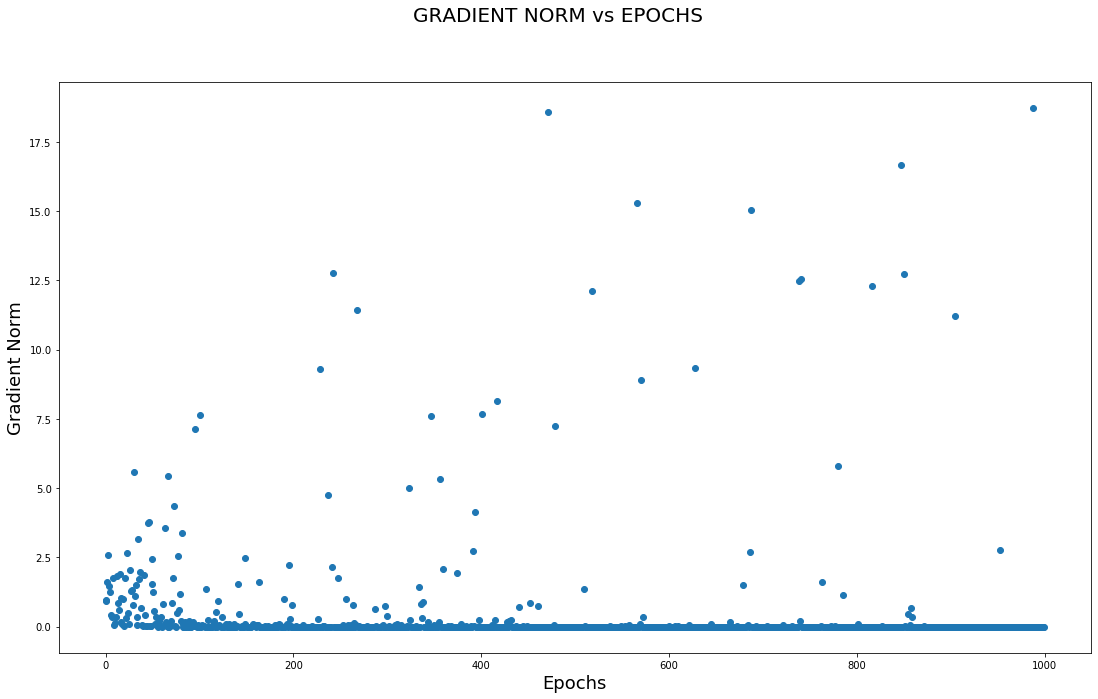

In [18]:
x = np.arange(len(gradien_vector))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('GRADIENT NORM vs EPOCHS', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Gradient Norm', fontsize=18)
plt.scatter(x,gradien_vector)
plt.savefig('scatterplot_gradient norm vs epochs.pdf')
